# โหลดข้อมูลและตรวจสอบเบื้องต้น

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('titanic')
df.sample(5) # สุ่มเลือก5ตัวอย่าง

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
292,0,2,male,36.0,0,0,12.875,C,Second,man,True,D,Cherbourg,no,True
649,1,3,female,23.0,0,0,7.550,S,Third,woman,False,NaN,Southampton,yes,True
131,0,3,male,20.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
555,0,1,male,62.0,0,0,26.550,S,First,man,True,NaN,Southampton,no,True
619,0,2,male,26.0,0,0,10.500,S,Second,man,True,NaN,Southampton,no,True


In [2]:
df.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [3]:
df.info() # แสดงรายละเอียดข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
df.describe().round(2) # หาค่าสถิติเบื้องต้นทศนิยม 2 ตำแหน่ง

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


# หา Missing data

In [5]:
df.isnull().sum()  # ตรวจหาข้อมูลที่สูญหาย

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.isnull().any() # ตรวจดูว่าcolumunใดมี missing data บ้าง ถ้ามีตอบ True ไม่มีจะตอบ False

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [7]:
# ตรวจสอบเปอร์เซ็นต์ของ Missing data
missing_count = df.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100

print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Total cells : 13365
Total missing values : 869
Missing data overall : 6.502057613168724%


# ตรวจสอบ Missing data แต่ละคอลัมน์

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### การจัดการกับ Missing data มีหลายวิธี ในส่วนนี้ ใช้ 3 วิธี
- เติมข้อมูลด้วย ค่าเฉลี่ย หรือ ค่ากลางอื่น
- เติมข้อมูลหรือแทนที่ด้วยค่าใดค่าหนึ่ง
- ลบแถวหรือคอลัมน์นั้นทิ้งไปเลย (มีข้อเสียคือ ทำให้สูญเสียข้อมูลหายไป)

# พิจารณาการจัดการ Missing Data 

- จัดการ column โดยพิจารณาจาก missing values Ratio 

In [9]:
# ตรวจสอบเปอร์เซ็นต์ของ Missing data
# Embarked
missing_count = df.embarked.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.embarked.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100

print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Total cells : 891
Total missing values : 2
Missing data overall : 0.22446689113355783%


In [10]:
# embark_town
missing_count = df.embark_town.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.embark_town.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100
missing_percent = total_missing/total_cells *100
print('Embark_town')
print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Embark_town
Total cells : 891
Total missing values : 2
Missing data overall : 0.22446689113355783%


In [11]:
df.embarked[df.embarked.isnull()] #หาข้อมูลที่เป็น missing data คอลัมน์ embarked

61     NaN
829    NaN
Name: embarked, dtype: object

In [12]:
df.embark_town[df.embark_town.isnull()] #หาข้อมูลที่เป็น missing data คอลัมน์ embark_town

61     NaN
829    NaN
Name: embark_town, dtype: object

In [13]:
# คิดเป็น 0.22 % ตัดข้อมูลrow นี้ได้เกิด missing data ตำแหน่งเดียวกันด้วย
cols = ['embarked', 'embark_town']
df.dropna(subset=cols, inplace=True) # จัดการเฉพาะ Temp , Humid
df.isnull().any() 

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck            True
embark_town    False
alive          False
alone          False
dtype: bool

#################### กลับมาดึงข้อมูลหัลงได้ model ที่ดีที่สุดแล้ว ####################

In [14]:
df_the_best_model = df

#################### กลับมาดึงข้อมูลหัลงได้ model ที่ดีที่สุดแล้ว ####################

In [15]:
# deck
missing_count = df.deck.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.deck.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100
print('Deck')
print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Deck
Total cells : 889
Total missing values : 688
Missing data overall : 77.39032620922384%


In [16]:
cols = ['deck']
df.drop(cols, axis='columns', inplace=True) # ลบคอลัมน์  deck ไป เพราะมีmissingdata เยอะเกินไป
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


- แทนที่ Missing data (age) ด้วยค่ากลาง

In [17]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,889.00,889.00,712.00,889.00,889.00,889.00
mean,0.38,2.31,29.64,0.52,0.38,32.10
std,0.49,0.83,14.49,1.10,0.81,49.70
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.90
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [18]:
# เนื่องจาก อายุมี 'child' ณ column 'who' ด้วยการเติม median or mean ไปตรงๆ ไม่สมเหตุสมผล
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [19]:
# ควรเติมอายุเด็ก แยกจาก man and woman ตรวจสอบ % เด็กๆ
who_child = df.who[df.who=='child'].count()
print('who child = {} คน'.format(who_child))
print('{:.2f} %'.format(who_child /df.shape[0]*100))

who child = 83 คน
9.34 %


In [20]:
df_child = df[df.who == 'child'] # แยกเด็กออกมาหาค่ากลาง

In [21]:
df_child.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,83.00,83.00,83.00,83.00,83.00,83.00
mean,0.59,2.63,6.37,1.73,1.27,32.79
std,0.49,0.62,4.73,1.64,0.68,33.47
min,0.00,1.00,0.42,0.00,0.00,7.22
25%,0.00,2.00,2.00,0.00,1.00,15.90
50%,1.00,3.00,5.00,1.00,1.00,26.25
75%,1.00,3.00,9.50,3.00,2.00,32.19
max,1.00,3.00,15.00,5.00,2.00,211.34


In [22]:
df_child.age.median() # ตรวจค่า median age
df_child.age.mean() # ตรวจค่า mean age

6.369518072289157

In [23]:
# เปลี่ยนข้อมูล woman and man เป็น adult
to_change = ['man', 'woman']
df.who.replace(to_change, 'adult', inplace=True)

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,adult,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,adult,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,adult,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,adult,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,adult,True,Southampton,no,True


In [25]:
# ดังนั้น column adult_male จึงไม่จำเป็น
df.drop('adult_male', axis='columns', inplace=True)

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,adult,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,adult,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,adult,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,adult,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,adult,Southampton,no,True


In [27]:
df_adult = df[df.who == 'adult'] # ผู้ใหญ่ออกมาหาค่ากลาง
df_adult.age.mean() # ตรวจค่า mean age adult

32.713036565977745

In [28]:
# เลือกใช้ค่า df_child.age.mean() แทน missing value ใน child
# เลือกใช้ค่า df_adult.age.mean() แทน missing value ใน adult
colm = 'age'# เลือกคอลัมน์ที่จะสนใจแทนที่ข้อมูล
if np.where(df['who']=='child'):
    df[colm] = df[colm].fillna(df_child.age.mean())
elif np.where(df['who']=='adult'):
     df[colm] = df[colm].fillna(df_adult.age.mean())
        
#df.head()
#df.describe().round(2)

In [29]:
# ตรวจดูยังมี na อยู่หรือไม่
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
embark_town    False
alive          False
alone          False
dtype: bool

In [30]:
# ตรวจสอบว่าเปลี่ยนสำเร็จไหม
df_child = df[df.who == 'child'] #
df_adult = df[df.who == 'adult'] # ผู้ใหญ่ออกมาหาค่ากลาง
print('mean age of adult :',df_adult.age.mean()) # ตรวจค่า mean age adult ต้องเท่ากับ 32.76782884310618 ไม่เท่าเดิมเพราะมี missiong values
print('mean age of child :',df_child.age.mean()) # ตรวจค่า mean age adult ต้องเท่ากับ 6.369518072289157 เท่าเดิมเพราะ ไม่มี missiong values 

mean age of adult : 26.92792146252512
mean age of child : 6.369518072289157


In [31]:
#กำจัด missing data สำเร็จ !!

# Data Cleansing 

- จัดการกับข้อมูลที่ซ้ำเกินความจำเป็น

In [32]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
embark_town      object
alive            object
alone              bool
dtype: object

In [33]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alive,alone
448,1,3,female,5.000000,2,1,19.2583,C,Third,child,Cherbourg,yes,False
487,0,1,male,58.000000,0,0,29.7000,C,First,adult,Cherbourg,no,True
330,1,3,female,6.369518,2,0,23.2500,Q,Third,adult,Queenstown,yes,False
432,1,2,female,42.000000,1,0,26.0000,S,Second,adult,Southampton,yes,False
456,0,1,male,65.000000,0,0,26.5500,S,First,adult,Southampton,no,True


In [34]:
# กำจัด column ที่ซ้ำ คือ class, alive, embark_town
col = ['class', 'alive', 'embark_town']
df.drop(col, axis='columns', inplace=True)

In [35]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
720,1,2,female,6.000000,0,1,33.0000,S,child,False
592,0,3,male,47.000000,0,0,7.2500,S,adult,True
793,0,1,male,6.369518,0,0,30.6958,C,adult,True
274,1,3,female,6.369518,0,0,7.7500,Q,adult,True
261,1,3,male,3.000000,4,2,31.3875,S,child,False


# Preprocessing

In [36]:
#ทำ labelencoding สำหรับ X (input)
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb
        
columns =  ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'alone']
labelEncode(df, columns)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   889 non-null    int64  
 1   pclass     889 non-null    int64  
 2   sex        889 non-null    object 
 3   age        889 non-null    float64
 4   sibsp      889 non-null    int64  
 5   parch      889 non-null    int64  
 6   fare       889 non-null    float64
 7   embarked   889 non-null    object 
 8   who        889 non-null    object 
 9   alone      889 non-null    bool   
 10  pclass_    889 non-null    int64  
 11  sex_       889 non-null    int32  
 12  age_       889 non-null    int64  
 13  sibsp_     889 non-null    int64  
 14  parch_     889 non-null    int64  
 15  fare_      889 non-null    int64  
 16  embarked_  889 non-null    int32  
 17  who_       889 non-null    int32  
 18  alone_     889 non-null    int64  
dtypes: bool(1), float64(2), int32(3), int64(10), objec

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone,pclass_,sex_,age_,sibsp_,parch_,fare_,embarked_,who_,alone_
0,0,3,male,22.0,1,0,7.2500,S,adult,False,2,1,29,1,0,18,2,0,0
1,1,1,female,38.0,1,0,71.2833,C,adult,False,0,0,52,1,0,207,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,adult,True,2,0,35,0,0,41,2,0,1
3,1,1,female,35.0,1,0,53.1000,S,adult,False,0,0,48,1,0,189,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,adult,True,2,1,48,0,0,43,2,0,1


In [39]:
col_sel = ['pclass_', 'sex_', 'age_', 'sibsp_', 'parch_', 'fare_', 'embarked_', 'who_', 'alone_']
X_pp = df[col_sel]

In [40]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
X = X_pp 
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)
#df_sc.info()


,pclass_,sex_,age_,sibsp_,parch_,fare_,embarked_,who_,alone_
0,1.0,1.0,0.330,0.167,0.0,0.073,1.0,0.0,0.0
1,0.0,0.0,0.591,0.167,0.0,0.841,0.0,0.0,0.0
2,1.0,0.0,0.398,0.000,0.0,0.167,1.0,0.0,1.0
3,0.0,0.0,0.545,0.167,0.0,0.768,1.0,0.0,0.0
4,1.0,1.0,0.545,0.000,0.0,0.175,1.0,0.0,1.0


In [41]:
col_sel = ['pclass_', 'sex_', 'age_', 'sibsp_', 'parch_', 'fare_', 'embarked_', 'who_', 'alone_']
X_sc = df_sc[col_sel]
y = df['survived']

- เลือก Feature ด้วย  Univariate Selction (category)

In [42]:
# ทำการ import ไลบรารี่และ fit ข้อมูลเพื่อเลือก features ที่ดีที่สุด
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func = chi2, k=5) # กำหนดค่า k (จำนวนคอลัมน์ที่ต้องการ)
fit = test.fit(X_sc, y)

np.set_printoptions(precision = 3)
print(fit.scores_) # แสดง scores
features = fit.transform(X_sc)

[2.656e+01 9.151e+01 4.132e-03 1.844e-01 1.741e+00 1.832e+01 5.226e+00
 1.519e+01 1.505e+01]


In [43]:
#จะได้ค่า Score ของแต่ละคอลัมน์และแสดงตัวอย่างข้อมูลที่ควรนำไปใช้
# หากต้องการเทียบข้อมูลให้ใช้
dfts = pd.DataFrame(fit.scores_, columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by= 'score', ascending=False)
df_sc = pd.DataFrame(X_sc, columns=X.columns) # เตรียม df_sc ไว้

In [44]:
# ควรตัด age, parch ออกไปถ้าต้องการลดให้เหลือ 5 column
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column # เรียงลำดับ 5 อันดับคะแนนสูงสุด
#cols_fts = dfts.nlargest(5, 'score').column # หรือใช้ nlargest
X_US_fts = df_sc[cols_fts].copy()
X_US_fts.shape #จะเหลือ 5 คอลัมน์
X_US_fts.sample(5) # จะได้ features ที่ใช้มี sex_,	pclass_, who_, alone_, fare

,sex_,pclass_,fare_,who_,alone_
80,1.0,1.0,0.260163,0.0,1.0
62,1.0,1.0,0.597561,1.0,0.0
71,1.0,0.5,0.845528,0.0,1.0
741,0.0,0.0,0.991870,0.0,0.0
719,0.0,0.5,0.658537,1.0,0.0


- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

เป็นเทคนิค Feature Selection ที่วนรอบการกำจัดเอา Feature ออกไป มีหลักการคือต้องการสร้าง Model classifier ตัวฐานก่อน จากนั้นทำการประเมิณ Features แล้วรายงานผลว่า Feature ตัวใดควรเอาไว้ ควรตัดทิ้ง

In [45]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

model = LinearSVC() # สร้าง model classifier เพื่อประเมิณ feature ย่อยๆ
rfe = RFE(model, 5) # สร้าง RFE model และ เลือก 5 Features
rfe = rfe.fit(X_sc,y)

print(rfe.support_) # แสดงผลการประเมิณการเลือก Features
print(rfe.ranking_)

[False  True False  True  True  True False  True False]
[2 1 3 1 1 1 5 1 4]


In [46]:
# 1(True) ควรเลือก Feature นั้นไว้
# ให้อ่าน features ที่เราควรเลือกไว้ใช่้
cols_fts = []
for i,cl in enumerate(X.columns):
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts # แนะนำให้เลือก features เหล่านี้ไปใช้

['sex_', 'sibsp_', 'parch_', 'fare_', 'who_']

In [47]:
# เลือกใช้งาน cols_fts
X_RFS_fts = df_sc[cols_fts]
X_RFS_fts.head()

,sex_,sibsp_,parch_,fare_,who_
0,1.0,0.166667,0.0,0.073171,0.0
1,0.0,0.166667,0.0,0.841463,0.0
2,0.0,0.000000,0.0,0.166667,0.0
3,0.0,0.166667,0.0,0.768293,0.0
4,1.0,0.000000,0.0,0.174797,0.0


In [48]:
X_US_fts.sample(5)

,sex_,pclass_,fare_,who_,alone_
653,0.0,1.0,0.028455,0.0,1.0
614,0.0,0.5,0.821138,0.0,0.0
753,0.0,0.5,0.821138,0.0,0.0
479,1.0,1.0,0.727642,1.0,0.0
659,1.0,0.0,0.943089,0.0,0.0


In [49]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_RFS_fts
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว


,SEX,PC,W,AL,F
0,0.735342,0.488500,-0.474326,-1.247313,-0.320901
1,-1.359911,0.488500,-0.474326,1.461772,-0.320901
2,-1.359911,-0.505267,-0.474326,-0.917636,-0.320901
3,-1.359911,0.488500,-0.474326,1.203764,-0.320901
4,0.735342,-0.505267,-0.474326,-0.888969,-0.320901


# เปรียบเทียบ model และ features แต่ละแบบ
- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [50]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_RFS_fts # 'who_', 'sex_', 'sibsp', 'fare', 'pclass_'
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

In [51]:
# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

,SEX,PC,W,AL,F
0,0.735342,0.488500,-0.474326,-1.247313,-0.320901
1,-1.359911,0.488500,-0.474326,1.461772,-0.320901
2,-1.359911,-0.505267,-0.474326,-0.917636,-0.320901
3,-1.359911,0.488500,-0.474326,1.203764,-0.320901
4,0.735342,-0.505267,-0.474326,-0.888969,-0.320901


In [52]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
# แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)
from sklearn.model_selection import cross_val_score
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2,random_state=2020) 
from time import time

## 1. สำหรับ Decision Tree

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

In [53]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
start = time() # เวลาเริ่มต้น train
model_DT.fit(X_train, y_train)
finish_RFE_DT = time() -start
print('{:.5f} sec'.format(finish_RFE_DT)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_DT, X, y, cv=10) # k=5
cvs_RFE_DT = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00400 sec
Cross val scores [0.809 0.786 0.742 0.786 0.82  0.832 0.843 0.798 0.843 0.852]
mean 81.1070 %


## 2. สำหรับ Support Vector Machine

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

In [54]:
from sklearn.svm import SVC
model_SVC = SVC()
start = time() # เวลาเริ่มต้น train
model_SVC.fit(X_train, y_train)
finish_RFE_SVC = time() -start
print('{:.5f} sec'.format(finish_RFE_SVC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_SVC, X, y, cv=10) # k=5
cvs_RFE_SVC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.01701 sec
Cross val scores [0.82  0.854 0.764 0.865 0.82  0.798 0.809 0.786 0.843 0.852]
mean 82.1182 %


## 3. สำหรับ Naive Bayes

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB() # Naive Bayes
start = time() # เวลาเริ่มต้น train
model_NB.fit(X_train, y_train) # Train สร้าง model
finish_RFE_NB = time() -start
print('{:.5f} sec'.format(finish_RFE_NB)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_NB, X, y, cv=10) # precision
cvs_RFE_NB = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4))) 
print('mean {:.4f} %'.format(cvs.mean()*100)) 

0.00200 sec
Cross val scores [0.798 0.82  0.775 0.854 0.809 0.809 0.798 0.742 0.832 0.818]
mean 80.5414 %


## 4. สำหรับ k-Nearest Neighbors

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() #ตั้งค่า model n_neighbors = 1,2,3
start = time() # เวลาเริ่มต้น train
model_KNN.fit(X_train, y_train) # Train สร้าง model
finish_RFE_kNN = time() -start
print('{:.5f} sec'.format(finish_RFE_kNN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_KNN, X, y, cv=10) # k=5
cvs_RFE_kNN = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00300 sec
Cross val scores [0.775 0.82  0.708 0.832 0.82  0.809 0.832 0.832 0.843 0.841]
mean 81.1057 %


## 5. สำหรับ Random Forest

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [57]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X_train, y_train) # Train สร้าง model
finish_RFE_RF = time() -start
print('{:.5f} sec'.format(finish_RFE_RF)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=10) # k=5
cvs_RFE_RF = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.16601 sec
Cross val scores [0.798 0.798 0.73  0.82  0.865 0.843 0.82  0.809 0.843 0.795]
mean 81.2130 %


## 6. สำหรับ Logistic Regression

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [58]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_LR.fit(X_train, y_train) # Train สร้าง model
finish_RFE_LR = time() -start
print('{:.5f} sec'.format(finish_RFE_LR)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_LR, X, y, cv=10) # k=5
cvs_RFE_LR = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.04701 sec
Cross val scores [0.798 0.753 0.786 0.854 0.786 0.786 0.764 0.742 0.82  0.784]
mean 78.7398 %


# เปรียบเทียบ model และ features แต่ละแบบ
- การเลือกFeatures ด้วยวิธี  Univariate Selection (category)

In [59]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler
from time import time
sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_US_fts # 'sex_', 'pclass_', 'who_', 'alone_', 'fare'
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

In [60]:
# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

,SEX,PC,W,AL,F
0,0.735342,0.825209,-1.247313,-0.320901,-1.229349
1,-1.359911,-1.572211,1.461772,-0.320901,-1.229349
2,-1.359911,0.825209,-0.917636,-0.320901,0.813439
3,-1.359911,-1.572211,1.203764,-0.320901,-1.229349
4,0.735342,0.825209,-0.888969,-0.320901,0.813439


In [61]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
# แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2,random_state=2020) 

## 1. สำหรับ Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
start = time() # เวลาเริ่มต้น train
model_DT.fit(X_train, y_train)
finish_US_DT = time() -start
print('{:.5f} sec'.format(finish_US_DT)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_DT, X, y, cv=10) # k=5
cvs_US_DT = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00100 sec
Cross val scores [0.798 0.832 0.775 0.764 0.854 0.809 0.865 0.843 0.854 0.83 ]
mean 82.2280 %


## 2. สำหรับ Support Vector Machine

In [63]:
from sklearn.svm import SVC
model_SVC = SVC()
start = time() # เวลาเริ่มต้น train
model_SVC.fit(X_train, y_train)
finish_US_SVC = time() -start
print('{:.5f} sec'.format(finish_US_SVC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_SVC, X, y, cv=10) # k=5
cvs_US_SVC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.01100 sec
Cross val scores [0.843 0.82  0.753 0.843 0.843 0.764 0.832 0.786 0.865 0.807]
mean 81.5513 %


## 3. สำหรับ Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB() # Naive Bayes
start = time() # เวลาเริ่มต้น train
model_NB.fit(X_train, y_train) # Train สร้าง model
finish_US_NB = time() -start
print('{:.5f} sec'.format(finish_US_NB)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_NB, X, y, cv=10) # precision
cvs_US_NB = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4))) 
print('mean {:.4f} %'.format(cvs.mean()*100)) 

0.00200 sec
Cross val scores [0.618 0.73  0.753 0.809 0.753 0.832 0.775 0.719 0.798 0.795]
mean 75.8197 %


## 4. สำหรับ k-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() #ตั้งค่า model n_neighbors = 1,2,3
start = time() # เวลาเริ่มต้น train
model_KNN.fit(X_train, y_train) # Train สร้าง model
finish_US_kNN = time() -start
print('{:.5f} sec'.format(finish_US_kNN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_KNN, X, y, cv=10) # k=5
cvs_US_kNN = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00300 sec
Cross val scores [0.742 0.832 0.753 0.854 0.888 0.82  0.854 0.798 0.876 0.852]
mean 82.6800 %


## 5. สำหรับ  Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X_train, y_train) # Train สร้าง model
finish_US_RF = time() -start
print('{:.5f} sec'.format(finish_US_RF)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=10) # k=5
cvs_US_RF = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.17401 sec
Cross val scores [0.764 0.775 0.764 0.786 0.865 0.82  0.843 0.82  0.854 0.818]
mean 81.1032 %


## 6. สำหรับ Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_LR.fit(X_train, y_train) # Train สร้าง model
finish_US_LR = time() -start
print('{:.5f} sec'.format(finish_US_LR)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_LR, X, y, cv=10) # k=5
cvs_US_LR = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00400 sec
Cross val scores [0.809 0.798 0.764 0.854 0.798 0.786 0.764 0.742 0.809 0.773]
mean 78.9632 %


In [68]:
# สร้างตารางสรุปคะแนนเพื่อเลือก model และ Feature selection
Feature_selection_types = [
                            'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination',
                            'Univariate_Selection', 'Univariate_Selection','Univariate_Selection','Univariate_Selection','Univariate_Selection','Univariate_Selection'
                          ]
cross_val_score = [
                    cvs_RFE_DT, cvs_RFE_SVC, cvs_RFE_NB, cvs_RFE_kNN, cvs_RFE_RF, cvs_RFE_LR,
                    cvs_US_DT, cvs_US_SVC, cvs_US_NB, cvs_US_kNN, cvs_US_RF, cvs_US_LR
                  ]
time_score = [
                finish_RFE_DT, finish_RFE_SVC, finish_RFE_NB, finish_RFE_kNN, finish_RFE_RF, finish_RFE_LR,
                finish_US_DT, finish_US_SVC, finish_US_NB, finish_US_kNN, finish_US_RF, finish_US_LR
             ]
algorithm_types = ['Decision Tree', 'Support Vector Machine', 'Naive Bayes', 'k-Nearest Neighbors',
                   'Random Forest', 'Logistic Regression',
                  'Decision Tree', 'Support Vector Machine', 'Naive Bayes', 'k-Nearest Neighbors',
                   'Random Forest', 'Logistic Regression']
col_names = ['Algorithm', 'Feature selection', 'Cross validation score(means)', 'Times']

In [69]:
import pandas as pd
algorithm_types_series = pd.Series(algorithm_types)
Feature_selection_types_series = pd.Series(Feature_selection_types)
cross_val_score_series = pd.Series(cross_val_score)
time_score_series = pd.Series(time_score)
datas = zip(algorithm_types_series, Feature_selection_types_series, cross_val_score_series, time_score_series)
df = pd.DataFrame(datas , columns = col_names)

In [70]:
df

,Algorithm,Feature selection,Cross validation score(means),Times
0,Decision Tree,Recursive_Feature_Elimination,81.106997,0.004000
1,Support Vector Machine,Recursive_Feature_Elimination,82.118233,0.017006
2,Naive Bayes,Recursive_Feature_Elimination,80.541369,0.002001
3,k-Nearest Neighbors,Recursive_Feature_Elimination,81.105720,0.003000
4,Random Forest,Recursive_Feature_Elimination,81.212972,0.166013
5,Logistic Regression,Recursive_Feature_Elimination,78.739785,0.047006
6,Decision Tree,Univariate_Selection,82.228039,0.001003
7,Support Vector Machine,Univariate_Selection,81.551328,0.010998
8,Naive Bayes,Univariate_Selection,75.819714,0.002002
9,k-Nearest Neighbors,Univariate_Selection,82.680031,0.003000


# ทำ Bar plot เทียบแต่ละ Algorithm

In [71]:
# ทำการ import library สร้าง list model แล้ว loop ประเมินด้วย Cross Validation
# ทำการ import library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [72]:
# สร้าง list model
models = []
models.append(('LR', LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGBT',XGBClassifier()))

In [73]:
#  loop ประเมินด้วย Cross Validation
from sklearn.model_selection import cross_val_score

results = []
names = []
X = X_RFS_fts
for name, model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models
    cvs = cross_val_score(model, X, y, cv=10) # ตัวแปร model เก็บค่ามาจาก models ลำดับที่ 2 เช่น naemeเก็บ'LR' และ model เก็บ LogisticRegression()
    results.append(cvs) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std())) 

LR   0.787 (0.031)
kNN  0.811 (0.039)
NB   0.805 (0.029)
SVC  0.821 (0.031)
RFC  0.819 (0.031)
DT   0.816 (0.030)
XGBT 0.818 (0.041)


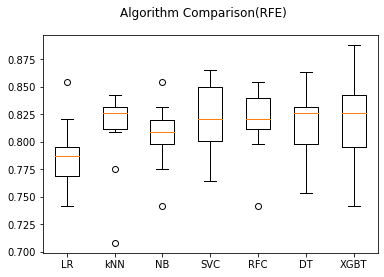

In [74]:
# พล็อตกราฟ boxplot เพื่อเลือก Best of algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison(RFE) ')
ax = fig.add_subplot(111) # row column id
plt.boxplot(results) # plot box plot
ax.set_xticklabels(names) # label ชื่อ แกน x
plt.show()

In [75]:
#  loop ประเมินด้วย Cross Validation
from sklearn.model_selection import cross_val_score

results = []
names = []
X = X_US_fts
for name, model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models
    cvs = cross_val_score(model, X, y, cv=10) # ตัวแปร model เก็บค่ามาจาก models ลำดับที่ 2 เช่น naemeเก็บ'LR' และ model เก็บ LogisticRegression()
    results.append(cvs) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std())) 

LR   0.790 (0.030)
kNN  0.827 (0.047)
NB   0.758 (0.058)
SVC  0.816 (0.035)
RFC  0.812 (0.032)
DT   0.822 (0.033)
XGBT 0.828 (0.036)


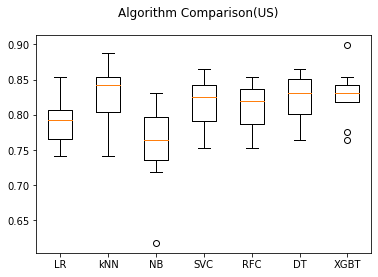

In [76]:
# พล็อตกราฟ boxplot เพื่อเลือก Best of algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison(US)')
ax = fig.add_subplot(111) # row column id
plt.boxplot(results) # plot box plot
ax.set_xticklabels(names) # label ชื่อ แกน x
plt.show()

- จากตาราง cross validation score และ time score การใช้ Feature selection ควรใช้ Feature selection: Univariate Selection
- 'sex_', 'pclass_', 'who_', 'alone_', 'fare'
- จากตาราง bar plot การเลือกใช้ algorithm ควรใช้ kNN(ให้ cross val score :82.79%, ) ซึ่งดีที่สุดเมื่อเทียบกับ Algorithm อื่นๆ

# หาค่า parameter ด้วย Grid Randomized

In [77]:
# Train model ใหม่โดยใช้ข้อมูลที่เลือก feature sex, pclass, who, alone, fare

In [78]:
# Architecture the best model
from sklearn.neighbors import KNeighborsClassifier

model_best_kNN =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=47, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=8, p=6,
                     weights='uniform')

In [79]:
df_the_best_model.head() # ดึงข้อมูลเก่ามา train model

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone,pclass_,sex_,age_,sibsp_,parch_,fare_,embarked_,who_,alone_
0,0,3,male,22.0,1,0,7.2500,S,adult,False,2,1,29,1,0,18,2,0,0
1,1,1,female,38.0,1,0,71.2833,C,adult,False,0,0,52,1,0,207,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,adult,True,2,0,35,0,0,41,2,0,1
3,1,1,female,35.0,1,0,53.1000,S,adult,False,0,0,48,1,0,189,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,adult,True,2,1,48,0,0,43,2,0,1


In [80]:
US_cols = ['sex', 'pclass', 'who', 'alone', 'fare']
df_the_best_model_US = df_the_best_model[US_cols]

In [81]:
df_the_best_model_US.head()

,sex,pclass,who,alone,fare
0,male,3,adult,False,7.2500
1,female,1,adult,False,71.2833
2,female,3,adult,True,7.9250
3,female,1,adult,False,53.1000
4,male,3,adult,True,8.0500


In [82]:
#ทำ labelencoding สำหรับ X (input)
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i +'_'] = lb
        
columns =  ['sex', 'pclass', 'who', 'alone', 'fare']
labelEncode(df_the_best_model_US, columns)

In [83]:
df_the_best_model_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      889 non-null    object 
 1   pclass   889 non-null    int64  
 2   who      889 non-null    object 
 3   alone    889 non-null    bool   
 4   fare     889 non-null    float64
 5   sex_     889 non-null    int32  
 6   pclass_  889 non-null    int64  
 7   who_     889 non-null    int32  
 8   alone_   889 non-null    int64  
 9   fare_    889 non-null    int64  
dtypes: bool(1), float64(1), int32(2), int64(4), object(2)
memory usage: 63.4+ KB


In [84]:
# ทำ label encoding สำหรับ y (Output)
df_the_best_model_US['survived_'] = y
df_the_best_model_US.head()

# save file เผื่อไว้ใช้ analysis
import pandas as pd
filepath = 'Titanic_sc_data.csv'
df_the_best_model_US.to_csv(filepath)

In [85]:
# สำหรับทำ Normalization 0-1 ลด Variance ให้เท่ากัน
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_', 'survived_'] # เลือกคอลัมน์ทำ normalization
X = df_the_best_model_US[col_select]
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex_       889 non-null    float64
 1   pclass_    889 non-null    float64
 2   who_       889 non-null    float64
 3   alone_     889 non-null    float64
 4   fare_      889 non-null    float64
 5   survived_  889 non-null    float64
dtypes: float64(6)
memory usage: 41.8 KB


In [86]:
#เปลี่ยนชนิดข้อมูล
df_sc['sex_'] = df_sc['sex_'].astype('object') # เปลี่ยนคอลัมน์ sex_ ให้เป็น Category
df_sc['pclass_'] = df_sc['pclass_'].astype('object') # เปลี่ยนคอลัมน์ pcalss_ ให้เป็น Category
df_sc['who_'] = df_sc['who_'].astype('object') # เปลี่ยนคอลัมน์ pcalss_ ให้เป็น Category
df_sc['alone_'] = df_sc['alone_'].astype('object') # เปลี่ยนคอลัมน์ alone_ ให้เป็น Category
df_sc['survived_'] = df_sc['survived_'].astype('category') # เปลี่ยนคอลัมน์ surived_ ให้เป็น Category

In [87]:
df_sc.info() # ตรวจสอบอีกรอบ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex_       889 non-null    object  
 1   pclass_    889 non-null    object  
 2   who_       889 non-null    object  
 3   alone_     889 non-null    object  
 4   fare_      889 non-null    float64 
 5   survived_  889 non-null    category
dtypes: category(1), float64(1), object(4)
memory usage: 35.8+ KB


In [88]:
# เลือก features
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_'] # เลือกคอลัมน์ทำ normalization
X = df_sc[col_select]
# เลือก label
col_select = ['survived_'] 
y = df_sc['survived_']

In [89]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 2020) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

In [90]:
# Architecture the best model
from sklearn.neighbors import KNeighborsClassifier

model_best_kNN =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=47, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=8, p=6,
                     weights='uniform')

In [91]:
start = time() # เวลาเริ่มต้น train
model_best_kNN.fit(X_train, y_train) # Train สร้าง model
finish = time() -start
print('{:.5f} sec'.format(finish)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_best_kNN, X, y, cv=10) # k=10
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00700 sec
Cross val scores [0.764 0.854 0.73  0.888 0.865 0.82  0.843 0.786 0.876 0.864]
mean 82.9060 %


# Save Model

In [92]:
from sklearn.externals import joblib

# save model kNN_The_best_model
joblib.dump(model_best_kNN,'kNN_The_best_model.pkl')

['kNN_The_best_model.pkl']

# การประเมิณ model

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_best_kNN.predict(X_test)
y_pred = y_predict # กำหนดให้ yที่ทำนายได้ คือ y_pred
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_best_kNN.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_test

Total X: 889
Total train: 711
Total test: 178
Score : 0.803
Accuracy Score: 0.803
              precision    recall  f1-score   support

  unsurvived       0.81      0.88      0.84       104
    survived       0.80      0.70      0.75        74

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[91 13]
 [22 52]]


884    0.0
199    0.0
327    1.0
516    0.0
252    0.0
      ... 
393    1.0
204    0.0
137    0.0
413    1.0
398    1.0
Name: survived_, Length: 178, dtype: category
Categories (2, float64): [0.0, 1.0]

In [94]:
# cross validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model_best_kNN, X, y, cv=10)
# ค่า confusion matrix ต่างๆคือ
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN, FP, FN, TP

precision_p = TP/(TP+FP)
precision_n = TN/(TN+FN)
recall_p = TP/(TP+FN)
recall_n = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:', (accuracy*100).round(2),'%')
print('Precision (Positive or survived):', precision_p.round(2))
print('Precision (Negative or unsurvived):',precision_n.round(2))
print('Recall (Positive or survived):', recall_p.round(2))
print('Recall (Negative or unsurvived):', recall_n.round(2))
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f}%'.format(cvs.mean()*100))  #ใช้เทียบกับ model อื่นๆ

Accuracy: 80.34 %
Precision (Positive or survived): 0.8
Precision (Negative or unsurvived): 0.81
Recall (Positive or survived): 0.7
Recall (Negative or unsurvived): 0.88
Cross val scores [0.764 0.854 0.73  0.888 0.865 0.82  0.843 0.786 0.876 0.864]
mean 82.9060%


# Confusion Matrix 1 Label

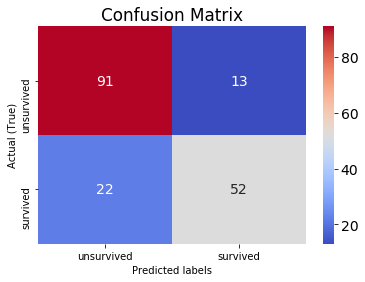

In [95]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()